<a href="https://colab.research.google.com/github/tanmay007thor/Chat-App/blob/master/FOAIP_P4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# implementation of gradient decent Algorithm.

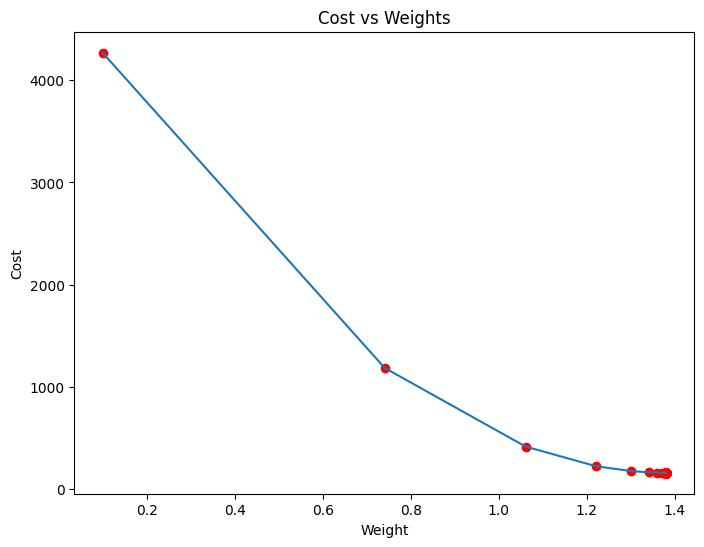

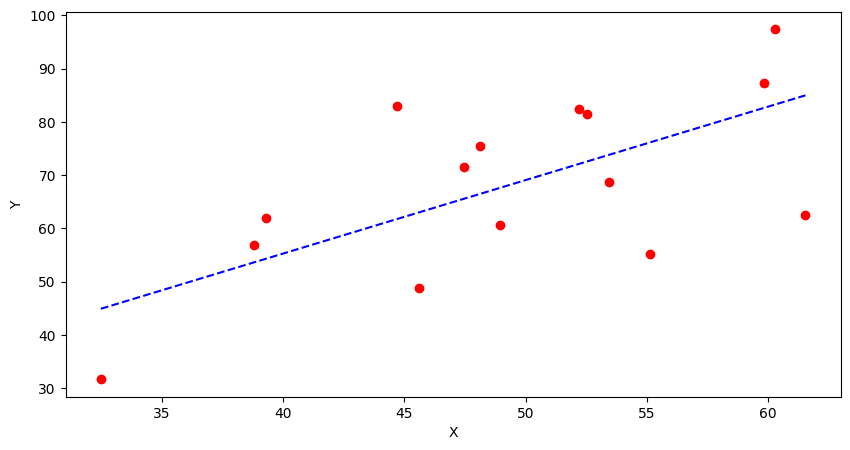

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def mean_squared_error(y_true, y_predicted):

	cost = np.sum((y_true-y_predicted)**2) / len(y_true)
	return cost


def gradient_descent(x, y, iterations = 1000, learning_rate = 0.0001,
					stopping_threshold = 1e-6):

	current_weight = 0.1
	current_bias = 0.01
	iterations = iterations
	learning_rate = learning_rate
	n = float(len(x))

	costs = []
	weights = []
	previous_cost = None

	for i in range(iterations):

		y_predicted = (current_weight * x) + current_bias

		current_cost = mean_squared_error(y, y_predicted)


		if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
			break

		previous_cost = current_cost

		costs.append(current_cost)
		weights.append(current_weight)

		weight_derivative = -(2/n) * sum(x * (y-y_predicted))
		bias_derivative = -(2/n) * sum(y-y_predicted)

		current_weight = current_weight - (learning_rate * weight_derivative)
		current_bias = current_bias - (learning_rate * bias_derivative)


	plt.figure(figsize = (8,6))
	plt.plot(weights, costs)
	plt.scatter(weights, costs, marker='o', color='red')
	plt.title("Cost vs Weights")
	plt.ylabel("Cost")
	plt.xlabel("Weight")
	plt.show()

	return current_weight, current_bias


def main():

	# Data
	X = np.array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
		55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
		48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754])
	Y = np.array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
		55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
			60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])
	estimated_weight, estimated_bias = gradient_descent(X, Y, iterations=2000)
	Y_pred = estimated_weight*X + estimated_bias
	plt.figure(figsize = (10,5))
	plt.scatter(X, Y, marker='o', color='red')
	plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',markersize=10,linestyle='dashed')
	plt.xlabel("X")
	plt.ylabel("Y")
	plt.show()
if __name__=="__main__":
	main()
